# Exercise 1: Grammars for Peano curves

* Formulate a grammar for the switch-back Peano curve and the Peano-Meander curve as shown in the lecture.
* Implement both grammars in an appropriate Python program.

#### Python ploting routines for space filling curves.

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

def plotLineStrip(x, y, title = None):
    _, ax = plt.subplots()
    plt.plot(x, y)
    if title is not None:
        plt.title(title)
    ax.set_xlim(min(x)-1, max(x)+1)
    ax.set_ylim(min(y)-1, max(y)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#### Terminals for space filling curves absolute direction grammar rules.

In [8]:
# functions to plot vertical and horizontal lines (end points are appended to the curve (x,y),
# the final plotting can be done with plotCurveDelayed() or plotLineStrip())
def plotLineUp(x, y, length):
    x.append(x[len(x) - 1])
    y.append(y[len(y) - 1] + length)

def plotLineDown(x, y, length):
    x.append(x[len(x) - 1])
    y.append(y[len(y) - 1] - length)

def plotLineLeft(x, y, length):
    x.append(x[len(x) - 1] - length)
    y.append(y[len(y) - 1])

def plotLineRight(x, y, length):
    x.append(x[len(x) - 1] + length)
    y.append(y[len(y) - 1])

#### Production rules for the switch-back Peano curve.

In [9]:
'''
recursion rules for the switch-back Peano curve
We assume that each Peano curve consist of 4 different patterns (nonterminals). For each pattern P, Q, R, S
a recursion rule has to be defined.

P:
 |--|  ^
 |  |  |
 |  |--|
 '''

def P(depth, x, y):
    if depth >= 0:
        P(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        P(depth - 1, x, y)

'''
Q:
 ^  |--|
 |  |  |
 |--|  |   
'''
def Q(depth, x, y):
    if depth >= 0:
        Q(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        Q(depth - 1, x, y)
    
'''S:
like Q but different traversal direction
'''
def S(depth, x, y):
    if depth >= 0:
        S(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        S(depth - 1, x, y)
    
'''
R:
like P but different traversal direction
'''
def R(depth, x, y):
    if depth >= 0:
        R(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        P(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        Q(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        R(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        S(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        R(depth - 1, x, y)

#### Production rules for Peano-Meander curve.

In [10]:
'''
recursion rules for Peano-meander curve
'''

def M(depth, x, y):
    if(depth >= 0):
        N(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        M(depth - 1, x, y)


def L(depth, x, y):
    if(depth >= 0):
        W(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        L(depth - 1, x, y)


def W(depth, x, y):
    if(depth >= 0):
        L(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        W(depth - 1, x, y)


def N(depth, x, y):
    if(depth >= 0):
        M(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        M(depth - 1, x, y)
        plotLineRight(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        N(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        L(depth - 1, x, y)
        plotLineDown(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineLeft(x, y, 1.0)
        W(depth - 1, x, y)
        plotLineUp(x, y, 1.0)
        N(depth - 1, x, y)

#### Peano type curves generating script.

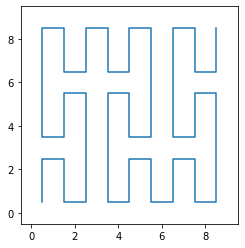

In [13]:
# set the number of the program you want to test
prog = 1
# set the curve's depth
depth = 1

# switch-back Peano curve
if prog == 1:
    x = [0.5]
    y = [0.5]
    P(depth, x, y)
    plotLineStrip(x, y, None)

# Peano-meander curve
elif prog == 2:
    x = [0.5]
    y = [0.5]
    M(depth, x, y)
    plotLineStrip(x, y, None)

# Exercise 2: Real Turtle for the Hilbert Curve

The type of grammars which has been created in Exercise 1, can be used to derive an algorithm, which defines the travel direction of the curve in a global coordinate system.

In this Exercise we will derive a ''real'' turtle graphics algorithm for the Hilbert Curve, that only uses the following commands:

* Go one step ahead.
* Turn the travel direction by $90^\circ$ to the right.
* Turn the travel direction by $90^\circ$ to the left.

Try to find an algorithm for which the turtle turns at most once after doing a step (so it shouldn't turn more than once by $90^\circ$ at the same spot). Implement the grammar.

#### Terminals for the Hilbert curve turtle graphics.

In [13]:
# turtle: one step ahead
def turtleStep(turtle, x, y):
    if(turtle == 0):
        plotLineUp(x, y, 1.0)
    elif(turtle == 1):
        plotLineRight(x, y, 1.0)
    elif(turtle == 2):
        plotLineDown(x, y, 1.0)
    elif(turtle == 3):
        plotLineLeft(x, y, 1.0)
    return turtle

# turtle: turn to the left
def turtleLeft(turtle):
    return (turtle - 1 + 4) % 4

# turtle: turn to the right
def turtleRight(turtle):
    return (turtle + 1) % 4

#### Production rules for the Hilbert curve turtle graphics.

In [22]:
'''
recursion rules for the "turtle"-Hilbert algorithm
'''

# recursion rules for the turtle-Hilbert algorithm
def H1(depth, turtle, x, y): # H in the worksheet
    if(depth >= 0):
        turtle = H2(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H1(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H5(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H3(depth - 1, turtle, x, y)
    else:
        turtle = turtleRight(turtle)
    return turtle

def H2(depth, turtle, x, y): # B in the worksheet
    if(depth >= 0):
        turtle = H1(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H6(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H3(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H5(depth - 1, turtle, x, y)
    return turtle

def H3(depth, turtle, x, y): # L in the worksheet
    if(depth >= 0):
        turtle = H1(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H6(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H3(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H4(depth - 1, turtle, x, y)
    else:
        turtle = turtleLeft(turtle)
    return turtle

def H4(depth, turtle, x, y): # E in the worksheet
    if(depth >= 0):
        turtle = H6(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H1(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H5(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H3(depth - 1, turtle, x, y)
    return turtle

def H5(depth, turtle, x, y): # T in the worksheet
    if(depth >= 0):
        turtle = H6(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H1(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H5(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H2(depth - 1, turtle, x, y)
    else:
        turtle = turtleRight(turtle)
    return turtle

def H6(depth, turtle, x, y): # R in the worksheet
    if(depth >= 0):
        turtle = H4(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H6(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H3(depth - 1, turtle, x, y)
        turtleStep(turtle, x, y)
        turtle = H5(depth - 1, turtle, x, y)
    else:
        turtle = turtleLeft(turtle)
    return turtle

#### Hilbert curve generating script.

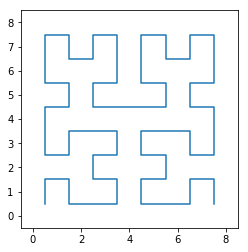

In [23]:
# turtle for the Hilbert curve
depth = 2
turtle = 0
x = [0.5]
y = [0.5]
H1(depth, turtle, x, y)
plotLineStrip(x, y, None)